In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import configparser
config = configparser.ConfigParser()
config.read('config.py')
api_key = config['DEFAULT']['API_KEY']

c = Census(api_key)

what is the goal that you are trying to accomplish here?
to get bins of the population data 


In [2]:
# Run Census Search to retrieve data on all zip codes (2013 ACS5 Census)
# See: https://github.com/CommerceDataService/census-wrapper for library documentation
# See: https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b for labels
census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E", 
                          #"B15003_002E", 
                          #"B15003_017E", 
                          #"B15003_018E", 
                          #"B15003_021E", 
                          #"B15003_022E",
                          #"B15003_025E",
                          #"B15003_023E",
                          #"B15003_024E", 
                          "B17001_002E", "B23025_002E", "B23025_007E"), {'for': 'county:*'}, year=2016)

# census_data = c.acs5.get('NAME', geo={'for': 'tract:*',
#                        'in': 'state:{} county:170'.format(states.AK.fips)})

# census_data = c.acs5.tables()

#census_data = c.acs5.state(('NAME', 'B25034_010E'), states.MD.fips, year=2010)

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                       "B01002_001E": "Median Age",
                                       "B19013_001E": "Household Income",
                                       "B19301_001E": "Per Capita Income",
                                       "B17001_002E": "Poverty Count",
                                       "B23025_002E": "Employed Persons Over 16",
                                       "B23025_007E": "Unemployed Persons Over 16",
                                       #"B15003_002E": "People Over 25 with No Education",
                                       #"B15003_017E": "People Over 25 Finished High School",
                                       #"B15003_018E": "People Over 25 with GED",
                                       #"B15003_021E": "People Over 25 with Associate's Degree",
                                       #"B15003_022E": "People Over 25 with Bachelor's Degree",
                                       #"B15003_023E": "People Over 25 with Master's Degree",
                                       #"B15003_024E": "People Over 25 with Professional Degree",
                                       #"B15003_025E": "People Over 25 with Doctoral Degree",
                                       "NAME": "County", "zip code tabulation area": "Zipcode"})

# Add in Poverty Rate (Poverty Count / Population)
#census_pd["Poverty Rate"] = 100 * \
   # census_pd["Poverty Count"].astype(
      #  int) / census_pd["Population"].astype(int)

# Final DataFrame
#census_pd = census_pd[["Zipcode", "Population", "Median Age", "Household Income",
#                      "Per Capita Income", "Poverty Count", "Poverty Rate", "Male Office workers"]]


# Visualize
print(len(census_pd))
census_pd

3220


,County,Household Income,Population,Median Age,Per Capita Income,Poverty Count,Employed Persons Over 16,Unemployed Persons Over 16,state,county
0,"Carroll County, Arkansas",38145.0,27690.0,44.4,20888.0,4789.0,12294.0,9897.0,05,015
1,"Chicot County, Arkansas",29628.0,11189.0,43.7,18853.0,3252.0,4137.0,4775.0,05,017
2,"Clark County, Arkansas",35595.0,22684.0,33.6,19500.0,4762.0,10900.0,7932.0,05,019
3,"Clay County, Arkansas",32404.0,15202.0,44.0,19192.0,3340.0,6744.0,5605.0,05,021
4,"Cleburne County, Arkansas",41717.0,25587.0,47.9,25078.0,3901.0,10670.0,10526.0,05,023
...,...,...,...,...,...,...,...,...,...,...
3215,"Manatí Municipio, Puerto Rico",18534.0,41468.0,40.0,10216.0,19121.0,13282.0,20168.0,72,091
3216,"Juana Díaz Municipio, Puerto Rico",20231.0,48658.0,36.7,10053.0,23218.0,18781.0,19742.0,72,075
3217,"Río Grande Municipio, Puerto Rico",22990.0,52479.0,39.6,10648.0,19400.0,22483.0,20306.0,72,119
3218,"Bayamón Municipio, Puerto Rico",24612.0,192974.0,39.8,13472.0,66051.0,80852.0,78231.0,72,021


*how to split the column into county and into state<br>
*then you can filter out by state

In [3]:
california_data = census_pd.loc[census_pd['state'] == "06"]
california_data

,County,Household Income,Population,Median Age,Per Capita Income,Poverty Count,Employed Persons Over 16,Unemployed Persons Over 16,state,county
186,"Alameda County, California",79831.0,1605217.0,37.2,39042.0,189590.0,864007.0,434239.0,06,001
187,"Alpine County, California",62375.0,1184.0,42.8,26783.0,221.0,468.0,499.0,06,003
188,"Amador County, California",57032.0,36963.0,50.3,27496.0,3684.0,14540.0,17341.0,06,005
189,"Butte County, California",44366.0,223877.0,36.9,25077.0,46456.0,102069.0,81862.0,06,007
190,"Calaveras County, California",53502.0,44787.0,51.2,30577.0,5641.0,18329.0,19512.0,06,009
191,"Colusa County, California",54946.0,21361.0,34.7,25745.0,2859.0,10049.0,5974.0,06,011
192,"Contra Costa County, California",82881.0,1107925.0,39.1,40792.0,111922.0,565656.0,311901.0,06,013
193,"Del Norte County, California",42363.0,27628.0,38.1,20282.0,5219.0,9978.0,12388.0,06,015
194,"El Dorado County, California",72586.0,183000.0,45.2,37089.0,17839.0,88875.0,60878.0,06,017
195,"Fresno County, California",45963.0,963160.0,31.6,21057.0,254872.0,432698.0,281602.0,06,019


In [5]:
# drop state and county code columns
california_data = california_data.drop(columns={"state", "county"})
california_data


,County,Household Income,Population,Median Age,Per Capita Income,Poverty Count,Employed Persons Over 16,Unemployed Persons Over 16
314,"Alameda County, California",70821.0,1494876.0,36.4,34937.0,173156.0,792734.0,401593.0
315,"Alpine County, California",59018.0,1167.0,40.4,29576.0,170.0,581.0,351.0
316,"Amador County, California",56180.0,38244.0,48.0,28030.0,3372.0,15650.0,17192.0
317,"Butte County, California",42971.0,219309.0,37.2,23431.0,42283.0,101633.0,77585.0
318,"Calaveras County, California",55256.0,45794.0,49.0,28667.0,3751.0,20270.0,17987.0
319,"Colusa County, California",49558.0,21297.0,33.5,21271.0,3029.0,10283.0,5348.0
320,"Contra Costa County, California",79135.0,1037817.0,38.3,38141.0,101562.0,534819.0,275053.0
321,"Del Norte County, California",37588.0,28561.0,38.9,19247.0,5313.0,10375.0,12614.0
322,"El Dorado County, California",68815.0,179878.0,43.1,34385.0,15010.0,92466.0,51492.0
323,"Fresno County, California",46903.0,920623.0,30.6,20638.0,211140.0,421989.0,255721.0


In [4]:
# Remove "County, California" from County column
for index, row in california_data.iterrows():
    county = row["County"]
    county_split = county.split(" County")
    california_data.loc[index, "County"] = str(county_split[0])
        
california_data.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,County,Household Income,Population,Median Age,Per Capita Income,Poverty Count,Employed Persons Over 16,Unemployed Persons Over 16,state,county
186,Alameda,79831.0,1605217.0,37.2,39042.0,189590.0,864007.0,434239.0,06,001
187,Alpine,62375.0,1184.0,42.8,26783.0,221.0,468.0,499.0,06,003
188,Amador,57032.0,36963.0,50.3,27496.0,3684.0,14540.0,17341.0,06,005
189,Butte,44366.0,223877.0,36.9,25077.0,46456.0,102069.0,81862.0,06,007
190,Calaveras,53502.0,44787.0,51.2,30577.0,5641.0,18329.0,19512.0,06,009


In [5]:
population_2016_df = california_data[["County","Population"]]
population_2016_df = population_2016_df.reset_index(drop=True)
population_2016_df.head()


,County,Population
0,Alameda,1605217.0
1,Alpine,1184.0
2,Amador,36963.0
3,Butte,223877.0
4,Calaveras,44787.0


In [6]:
fips_df = pd.read_csv('fips_dataframe.csv', dtype={'FIPS': object})
fips_df = fips_df[["FIPS","CTYNAME"]]
fips_df.head()

,FIPS,CTYNAME
0,6001,Alameda County
1,6003,Alpine County
2,6005,Amador County
3,6007,Butte County
4,6009,Calaveras County


In [7]:
for index, row in fips_df.iterrows():
    county = row["CTYNAME"]
    county_split = county.split(" County")
    fips_df.loc[index, "County"] = str(county_split[0])
        
fips_df.head()

,FIPS,CTYNAME,County
0,6001,Alameda County,Alameda
1,6003,Alpine County,Alpine
2,6005,Amador County,Amador
3,6007,Butte County,Butte
4,6009,Calaveras County,Calaveras


In [8]:
del fips_df["CTYNAME"]

In [10]:
merge_df = pd.merge(population_2016_df, fips_df, on="County")
merge_df = merge_df[["FIPS","County","Population"]]
merge_df.head()

,FIPS,County,Population
0,6001,Alameda,1605217.0
1,6003,Alpine,1184.0
2,6005,Amador,36963.0
3,6007,Butte,223877.0
4,6009,Calaveras,44787.0


In [11]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
merge_df.to_csv("population_2016.csv", encoding="utf-8", index=False, header=True)

In [23]:
max(merge_df['Population'])

9787747.0

In [24]:
min(merge_df['Population'])

1167.0

In [35]:
merge_df

,County,Population,Fips
0,Alameda,1494876.0,001
1,Alpine,1167.0,003
2,Amador,38244.0,005
3,Butte,219309.0,007
4,Calaveras,45794.0,009
5,Colusa,21297.0,011
6,Contra Costa,1037817.0,013
7,Del Norte,28561.0,015
8,El Dorado,179878.0,017
9,Fresno,920623.0,019


In [45]:
# Create bins in which to place values based upon TED Talk views
bins = [0, 14999, 59999, 150000, 430000, 2080000, 10000000]
# Create labels for these bins
group_labels = ["0 to 13k", "15k to 59k", "60k to 134k", "135k to 429k", 
               "430k to 2 mil", "2 mil to 10 mil"]

In [46]:
merge_df["Pop Group"] = pd.cut(merge_df["Population"], bins, labels=group_labels)

<AxesSubplot:xlabel='Pop Group'>

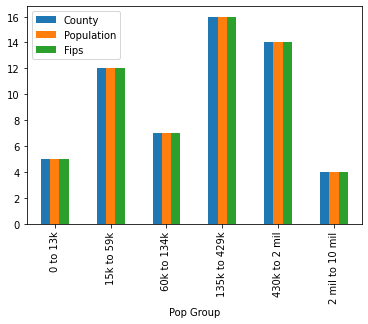

In [57]:
merge_df.groupby('Pop Group').count().plot(kind="bar")

In [88]:
sorted_df["Population"].median()

178554.5

In [65]:
test_series = sorted_df["Population"].values

In [79]:
test_series

array([1.167000e+03, 3.277000e+03, 9.587000e+03, 1.371100e+04,
       1.401600e+04, 1.829000e+04, 1.845700e+04, 2.019200e+04,
       2.129700e+04, 2.802700e+04, 2.856100e+04, 3.500100e+04,
       3.824400e+04, 4.468700e+04, 4.579400e+04, 5.487300e+04,
       5.573600e+04, 6.298500e+04, 6.439200e+04, 7.181700e+04,
       8.752500e+04, 9.419200e+04, 9.839200e+04, 1.335850e+05,
       1.353770e+05, 1.496110e+05, 1.523350e+05, 1.713430e+05,
       1.772310e+05, 1.798780e+05, 1.988890e+05, 2.193090e+05,
       2.506660e+05, 2.536060e+05, 2.594020e+05, 2.678710e+05,
       3.435540e+05, 4.113850e+05, 4.116200e+05, 4.197930e+05,
       4.362340e+05, 4.785510e+05, 5.124690e+05, 6.802770e+05,
       7.116220e+05, 7.979830e+05, 8.157450e+05, 8.292540e+05,
       9.206230e+05, 1.037817e+06, 1.408480e+06, 1.494876e+06,
       1.762754e+06, 2.023452e+06, 2.154844e+06, 2.989948e+06,
       3.060849e+06, 9.787747e+06])

https://data36.com/plot-histogram-python-pandas/

https://mode.com/example-gallery/python_histogram/

https://www.youtube.com/watch?v=snkkKrek7TU
Data camp binning data
making a histogram 

In [51]:
sorted_df = merge_df.sort_values(by="Population")
sorted_df.head()

,County,Population,Fips,Pop Group
1,Alpine,1167.0,003,0 to 13k
45,Sierra,3277.0,091,0 to 13k
24,Modoc,9587.0,049,0 to 13k
52,Trinity,13711.0,105,0 to 13k
25,Mono,14016.0,051,0 to 13k


In [59]:
print(sorted_df["Population"].mean())
print(sorted_df["Population"].std())

637400.0
1410432.107127893


In [61]:
sorted_df["Population"]

1        1167.0
45       3277.0
24       9587.0
52      13711.0
25      14016.0
21      18290.0
13      18457.0
31      20192.0
5       21297.0
10      28027.0
7       28561.0
17      35001.0
2       38244.0
46      44687.0
4       45794.0
34      54873.0
54      55736.0
51      62985.0
16      64392.0
57      71817.0
22      87525.0
50      94192.0
28      98392.0
11     133585.0
27     135377.0
19     149611.0
15     152335.0
12     171343.0
44     177231.0
8      179878.0
56     198889.0
3      219309.0
20     250666.0
23     253606.0
43     259402.0
39     267871.0
30     343554.0
26     411385.0
47     411620.0
41     419793.0
53     436234.0
48     478551.0
49     512469.0
38     680277.0
40     711622.0
37     797983.0
55     815745.0
14     829254.0
9      920623.0
6     1037817.0
33    1408480.0
0     1494876.0
42    1762754.0
35    2023452.0
32    2154844.0
29    2989948.0
36    3060849.0
18    9787747.0
Name: Population, dtype: float64

In [95]:
new_df = sorted_df.loc[sorted_df["Population"] < 9000000]

(array([36.,  7.,  5.,  2.,  2.,  1.,  1.,  1.,  0.,  2.]),
 array([1.1670000e+03, 3.0713520e+05, 6.1310340e+05, 9.1907160e+05,
        1.2250398e+06, 1.5310080e+06, 1.8369762e+06, 2.1429444e+06,
        2.4489126e+06, 2.7548808e+06, 3.0608490e+06]),
 <BarContainer object of 10 artists>)

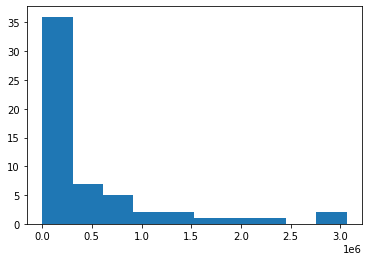

In [96]:
plt.hist(new_df["Population"])

In [91]:
test_again = sorted_df["Population"]
test_again

1        1167.0
45       3277.0
24       9587.0
52      13711.0
25      14016.0
21      18290.0
13      18457.0
31      20192.0
5       21297.0
10      28027.0
7       28561.0
17      35001.0
2       38244.0
46      44687.0
4       45794.0
34      54873.0
54      55736.0
51      62985.0
16      64392.0
57      71817.0
22      87525.0
50      94192.0
28      98392.0
11     133585.0
27     135377.0
19     149611.0
15     152335.0
12     171343.0
44     177231.0
8      179878.0
56     198889.0
3      219309.0
20     250666.0
23     253606.0
43     259402.0
39     267871.0
30     343554.0
26     411385.0
47     411620.0
41     419793.0
53     436234.0
48     478551.0
49     512469.0
38     680277.0
40     711622.0
37     797983.0
55     815745.0
14     829254.0
9      920623.0
6     1037817.0
33    1408480.0
0     1494876.0
42    1762754.0
35    2023452.0
32    2154844.0
29    2989948.0
36    3060849.0
18    9787747.0
Name: Population, dtype: float64

In [80]:
height = [185, 172, 172, 169, 181, 162, 186, 171, 177, 174, 184, 163, 174, 173, 182, 169, 174, 170, 176, 179, 169, 182, 181, 179, 181, 171, 175, 170, 174, 179, 171, 173, 171, 170, 171, 175, 169, 177, 185, 180, 174, 170, 171, 186, 176, 172, 177, 188, 176, 179, 177, 173, 169, 173, 174, 179, 181, 181, 177, 181, 171, 183, 179, 174, 178, 175, 182, 185, 189, 167, 167, 172, 176, 181, 177, 163, 174, 180, 177, 180, 174, 174, 177, 178, 177, 176, 171, 178, 176, 182, 183, 177, 173, 172, 178, 176, 173, 176, 172, 180, 173, 183, 178, 179, 169, 177, 180, 170, 174, 176, 167, 177, 181, 170, 178, 168, 175, 166, 182, 178, 175, 171, 183, 187, 164, 183, 185, 178, 168, 181, 174, 172, 168, 179, 180, 172, 179, 169, 180, 176, 174, 175, 181, 180, 179, 176, 176, 179, 177, 180, 174, 161, 182, 189, 178, 175, 175, 175, 176, 169, 172, 170, 177, 174, 178, 174, 181, 177, 189, 164, 172, 181, 191, 174, 176, 174, 183, 174, 180, 174, 168, 177, 179, 183, 175, 172, 179, 177, 177, 175, 182, 178, 187, 182, 179, 166, 179, 178, 180, 182, 173, 180, 172, 187, 168, 165, 166, 170, 169, 187, 174, 167, 182, 172, 168, 181, 179, 173, 184, 176, 185, 179, 185, 176, 168, 190, 172, 174, 171, 174, 177, 177, 179, 186, 175, 168, 168, 172, 165, 180, 173, 174, 175, 167, 170, 180, 179, 173, 186, 168]

(array([ 4.,  7., 24., 34., 48., 48., 46., 19., 14.,  6.]),
 array([161., 164., 167., 170., 173., 176., 179., 182., 185., 188., 191.]),
 <BarContainer object of 10 artists>)

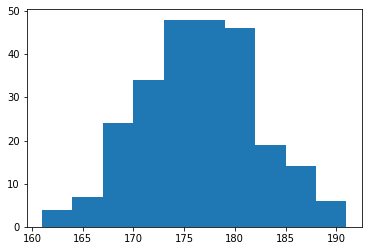

In [81]:
plt.hist(height)

In [85]:
height_array = np.asarray(height)

In [86]:
np.std(height_array)

5.712240891279008

In [89]:
np.median(height_array)

176.0

https://numpy.org/doc/stable/reference/generated/numpy.asarray.html

https://numpy.org/doc/stable/reference/generated/numpy.mean.html

https://numpy.org/doc/stable/reference/generated/numpy.std.html


https://stackoverflow.com/questions/33385238/how-to-convert-pandas-single-column-data-frame-to-series-or-numpy-vector

https://mode.com/example-gallery/python_histogram/